# Preparations

- Mount Google Drive 
- Copy and extract data,
- Checkout or pull to get the latest code from github.

In [1]:
import os, time

colab_data_dir = "/content/data/"
gdrive_workspace = r"/gdrive/My Drive/colab_workspace/advertima/data"

if not os.path.exists(colab_data_dir):
  !mkdir {colab_data_dir}
  print("Data folder created.")

if not os.path.exists("/gdrive"):
  print("Mounting google drive")
  from google.colab import drive
  drive.mount('/gdrive')
print("Google drive is mounted at /gdrive")
  
traindata_prefix = "300W_LP"
traindata_dir = os.path.join(colab_data_dir, traindata_prefix)
testdata_prefix = "AFLW2000"
testdata_dir = os.path.join(colab_data_dir, testdata_prefix)  
  
  
start_time = time.time()
if not os.path.exists(traindata_dir):  
  print("Extracting {}...".format(traindata_prefix))
  !unzip -qq -n {os.path.join(gdrive_workspace.replace(" ", "\ "), traindata_prefix) + ".zip"} -d  {colab_data_dir}
elapsed_time = time.time() - start_time
print("{} is ready ({:.1f} sec)".format(os.path.join(colab_data_dir, traindata_prefix), elapsed_time))
  
start_time = time.time()
if not os.path.exists(testdata_dir):  
  print("Extracting {}...".format(testdata_prefix)),
  !unzip -qq -n {os.path.join(gdrive_workspace.replace(" ", "\ "), testdata_prefix) + ".zip"} -d  {colab_data_dir}
elapsed_time = time.time() - start_time
print("{} is ready ({:.1f} sec)".format(os.path.join(colab_data_dir, testdata_prefix), elapsed_time))

!ls {colab_data_dir}

Data folder created.
Mounting google drive
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
Google drive is mounted at /gdrive
Extracting 300W_LP...
/content/data/300W_LP is ready (80.1 sec)
Extracting AFLW2000...
/content/data/AFLW2000 is ready (4.1 sec)
300W_LP  AFLW2000


**Code from github**

In [2]:
%cd /content
if not os.path.exists("/content/deep-head-pose"):
  # Clone the entire repo.
  !git clone -l -s https://github.com/emredog/deep-head-pose.git deep-head-pose
  %cd deep-head-pose/code
else:
  %cd deep-head-pose/code
  !git pull

/content
Cloning into 'deep-head-pose'...
remote: Enumerating objects: 198, done.
remote: Counting objects: 100% (198/198), done.
remote: Compressing objects: 100% (139/139), done.
remote: Total 11282 (delta 134), reused 104 (delta 59), pack-reused 11084
Receiving objects: 100% (11282/11282), 216.35 MiB | 28.58 MiB/s, done.
Resolving deltas: 100% (634/634), done.
/content/deep-head-pose/code


**Fetch or generate filenames**

In [3]:
from shutil import copyfile
import utils
       
  

for prefix in [traindata_prefix, testdata_prefix]:
  if not os.path.exists(os.path.join(colab_data_dir, prefix + "_filenames.txt")):
    # check the cache
    if os.path.exists(os.path.join(gdrive_workspace, prefix + "_filenames.txt")):
      copyfile(os.path.join(gdrive_workspace, prefix + "_filenames.txt"), 
               os.path.join(colab_data_dir, prefix + "_filenames.txt"))
    else:
      # generate from scratch
      utils.generate_filenames(os.path.join(colab_data_dir, prefix))
      copyfile(os.path.join(colab_data_dir, prefix + "_filenames.txt"), 
               os.path.join(gdrive_workspace, prefix + "_filenames.txt"))
    

  
print("Filenames files are ready.")
!ls -l {colab_data_dir}

Filenames files are ready.
total 4688
drwxr-xr-x 12 root root    4096 Nov 25  2015 300W_LP
-rw-r--r--  1 root root 4618569 Aug 15 05:46 300W_LP_filenames.txt
drwxr-xr-x  3 root root  135168 Mar 29  2016 AFLW2000
-rw-r--r--  1 root root   39380 Aug 15 05:46 AFLW2000_filenames.txt


# Training Hopenet on 300W_LP
Let's reproduce the training process in the paper





In [0]:
# batch size is 128, see https://github.com/natanielruiz/deep-head-pose/issues/55

# filename_list = os.path.join(colab_data_dir, testdata_prefix) + "_filenames.txt"
# !python train_hopenet.py --num_epochs 5 --batch_size 128 --lr 10e-5 --dataset AFLW2000 --data_dir /content/data --alpha 2 --filename_list {filename_list} --output_string Debug_on_AFLW2000 --out_dir {gdrive_workspace.replace(" ", "\ ")}

filename_list = os.path.join(colab_data_dir, traindata_prefix) + "_filenames.txt"
!python train_hopenet.py --num_epochs 25 --batch_size 128 --lr 10e-5 --dataset Pose_300W_LP --data_dir /content/data --alpha 2 --filename_list {filename_list} --output_string Reproduce_300W_LP_ --out_dir {gdrive_workspace.replace(" ", "\ ")}


Loading data.
Ready to train network.
Epoch [1/25], Iter [100/956] Losses: Yaw 208.4192, Pitch 260.9868, Roll 151.6089
Epoch [1/25], Iter [200/956] Losses: Yaw 117.3504, Pitch 220.0611, Roll 180.0715
Epoch [1/25], Iter [300/956] Losses: Yaw 103.4418, Pitch 181.4670, Roll 102.9651
Epoch [1/25], Iter [400/956] Losses: Yaw 84.4190, Pitch 110.1129, Roll 113.1441
Epoch [1/25], Iter [500/956] Losses: Yaw 52.0928, Pitch 72.8473, Roll 73.6279
Epoch [1/25], Iter [600/956] Losses: Yaw 5009.6548, Pitch 398.6605, Roll 429.7704
Epoch [1/25], Iter [700/956] Losses: Yaw 1925.0472, Pitch 321.9773, Roll 316.0841
Epoch [1/25], Iter [800/956] Losses: Yaw 1863.8120, Pitch 316.4185, Roll 267.6097
Epoch [1/25], Iter [900/956] Losses: Yaw 503.2821, Pitch 206.6443, Roll 260.0581
Epoch completed in 1196.1 seconds. Taking snapshot...
Epoch [2/25], Iter [100/956] Losses: Yaw 400.2158, Pitch 269.2081, Roll 251.8150
Epoch [2/25], Iter [200/956] Losses: Yaw 1531.4432, Pitch 300.8517, Roll 248.9890
Epoch [2/25], Ite

In [1]:
!ls /content/deep-head-pose/code/output/snapshots/

ls: cannot access '/content/deep-head-pose/code/output/snapshots/': No such file or directory


## Display Losses

21054


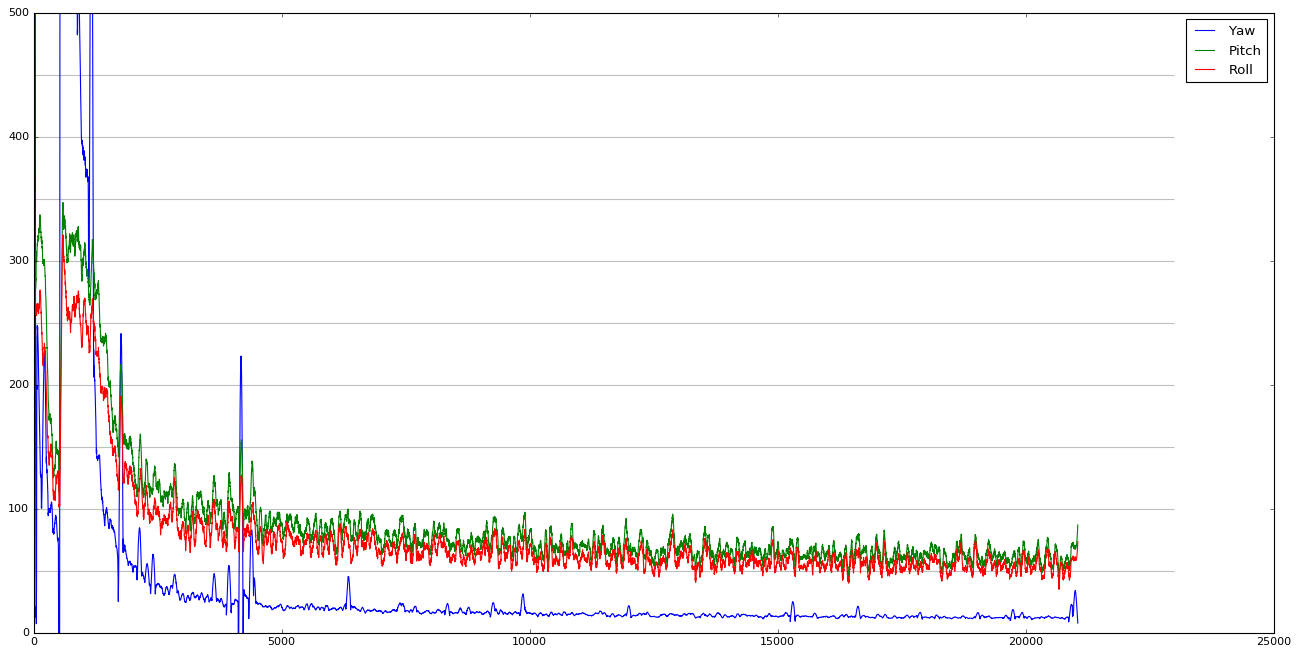

In [12]:
import pickle as pkl
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter # smoothing the curves
plt.style.use('classic')
%matplotlib inline

loss_file = gdrive_workspace + "/lossesReproduce_300W_LP_.pkl"
with open(loss_file, "rb") as file_handle:
  training_stats = pkl.load(file_handle)
  
print(len(training_stats["loss_yaw"]))

smoothing = lambda x: savgol_filter(x, 101, 3)

fig=plt.figure(figsize=(20, 10), dpi= 80, facecolor='w', edgecolor='k')

plt.plot(smoothing(training_stats["loss_yaw"]), label="Yaw")
plt.plot(smoothing(training_stats["loss_pitch"]), label="Pitch")
plt.plot(smoothing(training_stats["loss_roll"]), label="Roll")

plt.hlines(list(range(0, 500, 50)), 0, 23000, color='0.75')
plt.ylim(0, 500)
plt.legend()
plt.show()            

## Test with pretrained & reproduced model
**First, let's test with the provided pre-trained model (downloadable from original github page).**

In [71]:
model_path = os.path.join(gdrive_workspace, "weights", "hopenet_alpha2.pkl")

filename_list = os.path.join(colab_data_dir, testdata_prefix) + "_filenames.txt"
!python test_hopenet.py --batch_size 1 --dataset AFLW2000 --data_dir /content/data --filename_list {filename_list} --snapshot {model_path.replace(" ", "\ ")}

Loading snapshot.
Loading data.
Ready to test network.
/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:46: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
Test error in degrees of the model on the 1969 test images. Yaw: 6.4682, Pitch: 6.5448, Roll: 5.4226
Average inference time: 10.514586ms


Result: Yaw: 6.4682, Pitch: 6.5448, Roll: 5.4226

This is pretty close to Table 1 in paper.

**Now, try it with the model that I trained. NOTE: it was trained only for 22 epochs (due to Colab limitations), so I expect worse results than the pre-trained model, which was trained for 25 epochs according to paper.**

In [19]:
model_path = os.path.join(gdrive_workspace, "reproducing_paper_results", "Reproduce_300W_LP__epoch_22.pkl")

filename_list = os.path.join(colab_data_dir, testdata_prefix) + "_filenames.txt"
!python test_hopenet.py --batch_size 64 --dataset AFLW2000 --data_dir /content/data --filename_list {filename_list} --snapshot {model_path.replace(" ", "\ ")}

Loading snapshot.
Loading data.
Ready to test network.
/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:46: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
Test error in degrees of the model on the 1969 test images. Yaw: 17.3588, Pitch: 9.3072, Roll: 9.1508


Result: Yaw: 17.3588, Pitch: 9.3072, Roll: 9.1508

**The gap is rather large, actually a bit higher than what I expected.**.

# Train a Hopenet variant with Mobilenet backbone

In [0]:
filename_list = os.path.join(colab_data_dir, traindata_prefix) + "_filenames.txt"
val_filename_list = os.path.join(colab_data_dir, testdata_prefix) + "_filenames.txt"
!python train_hopenet_mobilenet.py --num_epochs 30 --batch_size 128 --mobilenet_width 0.5 --lr 10e-5 --dataset Pose_300W_LP --data_dir /content/data --alpha 2 --filename_list {filename_list} --val_filename_list {val_filename_list} --output_string MobileNet_HALFWIDTH2_on_Pose_300W_LP --out_dir {gdrive_workspace.replace(" ", "\ ")}

Loading data.
Ready to train network.
Epoch [1/30], Iter [100/956] Losses: Yaw 1773.0428, Pitch 291.0356, Roll 303.0475
Epoch [1/30], Iter [200/956] Losses: Yaw 833.6812, Pitch 262.7263, Roll 290.9182
Epoch [1/30], Iter [300/956] Losses: Yaw 709.5158, Pitch 271.5333, Roll 168.7082
Epoch [1/30], Iter [400/956] Losses: Yaw 1122.2262, Pitch 338.7652, Roll 227.5169
Epoch [1/30], Iter [500/956] Losses: Yaw 346.9140, Pitch 256.2077, Roll 195.2256
Epoch [1/30], Iter [600/956] Losses: Yaw 1238.2626, Pitch 369.2566, Roll 195.8279
Epoch [1/30], Iter [700/956] Losses: Yaw 426.6660, Pitch 257.5620, Roll 293.1282
Epoch [1/30], Iter [800/956] Losses: Yaw 311.6113, Pitch 227.7444, Roll 181.2004
Epoch [1/30], Iter [900/956] Losses: Yaw 374.1505, Pitch 304.7700, Roll 339.3631
Epoch completed in 955.3 seconds. Taking snapshot...
Validation error in degrees of the model on the 1969 test images. Yaw: 37.7582, Pitch: 12.8756, Roll: 13.5778
Epoch [2/30], Iter [100/956] Losses: Yaw 214.0641, Pitch 279.2149, 

Resume training for some more

In [4]:
filename_list = os.path.join(colab_data_dir, traindata_prefix) + "_filenames.txt"
val_filename_list = os.path.join(colab_data_dir, testdata_prefix) + "_filenames.txt"
last_snapshot = os.path.join(gdrive_workspace.replace(" ", "\ "), "MobileNet_HALFWIDTH2_on_Pose_300W_LP_epoch_18.pkl")
!python train_hopenet_mobilenet.py --snapshot {last_snapshot} --num_epochs 20 --batch_size 128 --mobilenet_width 0.5 --lr 10e-5 --dataset Pose_300W_LP --data_dir /content/data --alpha 2 --filename_list {filename_list} --val_filename_list {val_filename_list} --output_string MobileNet_HALFWIDTH2_18_on_Pose_300W_LP --out_dir {gdrive_workspace.replace(" ", "\ ")}

Loading weights from  /gdrive/My Drive/colab_workspace/advertima/data/MobileNet_HALFWIDTH2_on_Pose_300W_LP_epoch_18.pkl
Loading data.
Ready to train network.
Epoch [1/20], Iter [100/956] Losses: Yaw 22.6529, Pitch 39.0430, Roll 31.6097
Epoch [1/20], Iter [200/956] Losses: Yaw 16.1924, Pitch 286.9150, Roll 273.5739
Epoch [1/20], Iter [300/956] Losses: Yaw 18.2267, Pitch 157.1980, Roll 133.4327
Epoch [1/20], Iter [400/956] Losses: Yaw 18.9955, Pitch 171.0641, Roll 156.3464
Epoch [1/20], Iter [500/956] Losses: Yaw 16.5218, Pitch 91.1002, Roll 81.4354
Epoch [1/20], Iter [600/956] Losses: Yaw 17.4555, Pitch 70.3390, Roll 52.8045
Epoch [1/20], Iter [700/956] Losses: Yaw 13.3983, Pitch 68.0693, Roll 38.5564
Epoch [1/20], Iter [800/956] Losses: Yaw 25.2434, Pitch 68.1865, Roll 57.6952
Epoch [1/20], Iter [900/956] Losses: Yaw 16.8504, Pitch 39.2647, Roll 26.3438
Epoch completed in 944.5 seconds. Taking snapshot...
Validation error in degrees of the model on the 1969 test images. Yaw: 21.6549, P

## Display losses

17226


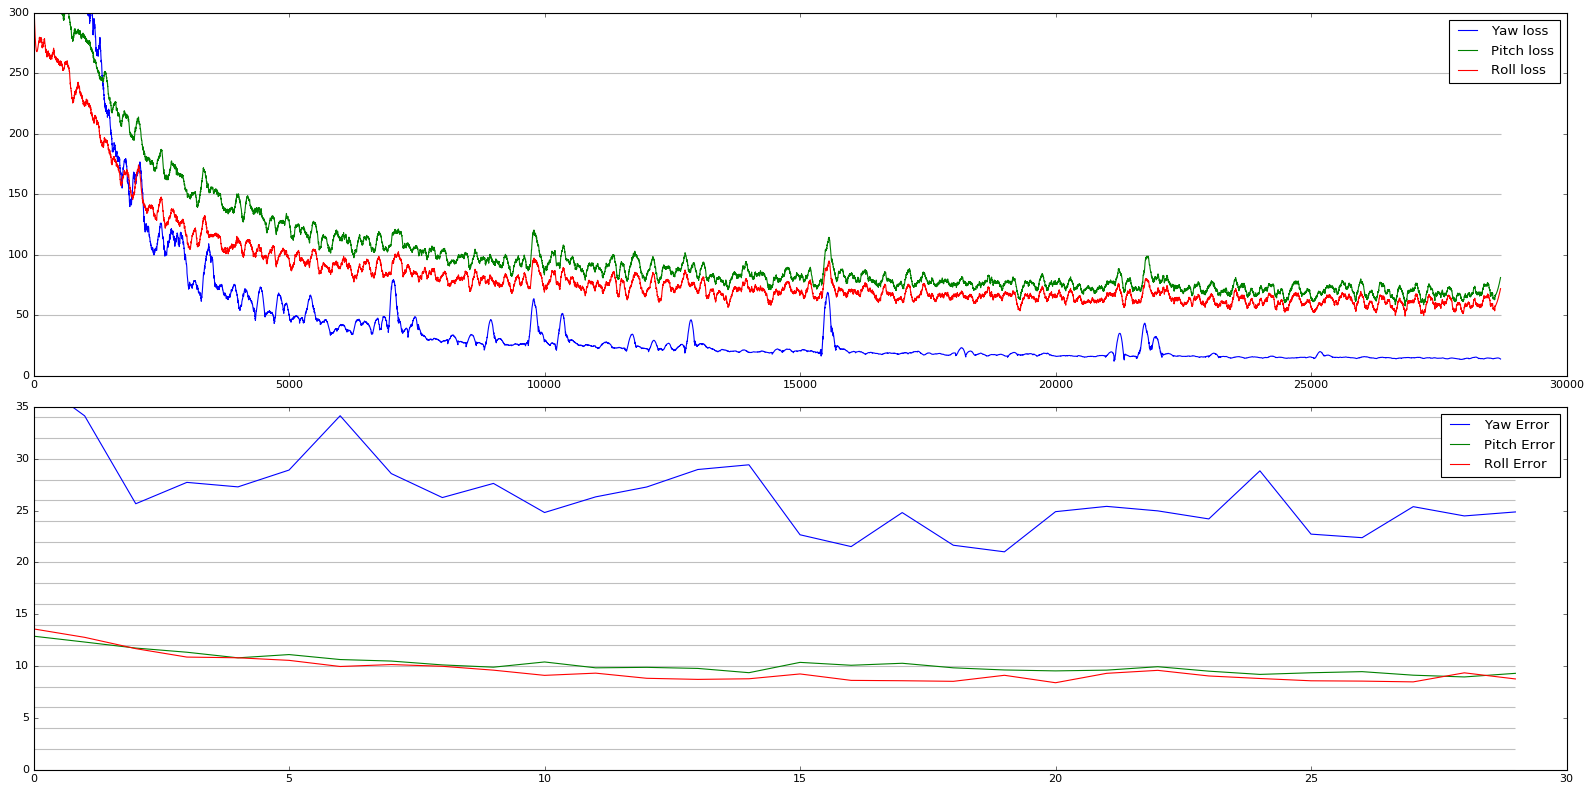

In [7]:
import pickle as pkl
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter # smoothing the curves
plt.style.use('classic')
%matplotlib inline

loss_file = gdrive_workspace + "/lossesMobileNet_HALFWIDTH2_on_Pose_300W_LP.pkl"
with open(loss_file, "rb") as file_handle:
  training_stats = pkl.load(file_handle)
  
# stats from resumed  
loss_file = gdrive_workspace + "/lossesMobileNet_HALFWIDTH2_18_on_Pose_300W_LP.pkl"
with open(loss_file, "rb") as file_handle:
  training_stats2 = pkl.load(file_handle)
  
print(len(training_stats["loss_yaw"]))

smoothing = lambda x: savgol_filter(x, 201, 3)

train_samples = len(training_stats["loss_yaw"]) + len(training_stats2["loss_yaw"])
val_samples = len(training_stats["val_yaw_error"]) + len(training_stats2["val_yaw_error"])


f, axes = plt.subplots(2, 1, sharex="none", figsize=(20, 10), dpi= 80, facecolor='w', edgecolor='k')
axes[0].plot(range(train_samples), smoothing(training_stats["loss_yaw"] + training_stats2["loss_yaw"]), label="Yaw loss")
axes[0].plot(range(train_samples), smoothing(training_stats["loss_pitch"] + training_stats2["loss_pitch"]), label="Pitch loss")
axes[0].plot(range(train_samples), smoothing(training_stats["loss_roll"] + training_stats2["loss_roll"]), label="Roll loss")
axes[0].hlines(list(range(0, 500, 50)), 0, train_samples-1, color='0.75')
axes[0].set_ylim(0, 300)
axes[0].legend()

axes[1].plot(training_stats["val_yaw_error"] + training_stats2["val_yaw_error"], label="Yaw Error")
axes[1].plot(training_stats["val_pitch_error"] + training_stats2["val_pitch_error"], label="Pitch Error")
axes[1].plot(training_stats["val_roll_error"] + training_stats2["val_roll_error"], label="Roll Error")
axes[1].hlines(list(range(0, 35, 2)), 0, val_samples-1, color='0.75')
axes[1].set_ylim(0, 35)
axes[1].legend()

f.tight_layout()
plt.show()

In [72]:
model_path = os.path.join(gdrive_workspace, "MobileNet_on_Pose_300W_LP_epoch_10.pkl")

filename_list = os.path.join(colab_data_dir, testdata_prefix) + "_filenames.txt"
!python test_hopenet.py --batch_size 1 --dataset AFLW2000 --data_dir /content/data --backbone mobilenet --filename_list {filename_list} --snapshot {model_path.replace(" ", "\ ")}

Loading snapshot.
Loading data.
Ready to test network.
/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:46: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
Test error in degrees of the model on the 1969 test images. Yaw: 10.0282, Pitch: 7.1470, Roll: 6.8022
Average inference time: 8.828250ms
